In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1️⃣ 데이터 로드 및 기본 정보 확인
- 데이터 크기 확인 (shape)
- 결측값 및 데이터 타입 확인 (info, isnull().sum())

In [31]:
data_path = "IBM_employee_attrition.csv"
df = pd.read_csv(data_path)

# 범주형 컬럼을 숫자로 변환하는 사전 (Label Encoding)
categorical_columns = df.select_dtypes(include=['object']).columns  # 범주형 컬럼 찾기
label_encoders = {}  # 변환된 매핑 저장

for col in categorical_columns:
    unique_values = df[col].unique()  # 고유한 값 찾기
    mapping = {val: idx for idx, val in enumerate(unique_values)}  # 매핑 생성
    df[col] = df[col].map(mapping)  # 매핑 적용
    label_encoders[col] = mapping  # 변환 정보 저장

# 변환된 데이터프레임 출력
print(df)

# 변환 매핑 출력
print("\n🔹 변환 매핑 정보:")
for col, mapping in label_encoders.items():
    print(f"{col}: {mapping}")

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          0               0       1102           0                 1   
1      49          1               1        279           1                 8   
2      37          0               0       1373           1                 2   
3      33          1               1       1392           1                 3   
4      27          1               0        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          1               1        884           1                23   
1466   39          1               0        613           1                 6   
1467   27          1               0        155           1                 4   
1468   49          1               1       1023           0                 2   
1469   34          1               0        628           1                 8   

      Education  EducationF

In [33]:


data_path = "IBM_employee_attrition.csv"
df = pd.read_csv(data_path)

# Attrition 변수 변환 (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["BusinessTravel"] = df["BusinessTravel"].map({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 0})
df["MaritalStatus"] = df["MaritalStatus"].map({'Single': 0, 'Married': 2, 'Divorced': 1})
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})
    
# 8:2 비율로 train/test 분리
split_index = int(1470 * 0.8)  # 8000번째 행까지 Train, 나머지 Test

# Split 컬럼 추가
df["Split"] = ["Train"] * split_index + ["Test"] * (1470 - split_index)

df.shape
df

# df.to_csv('IBM_employee_attrition_encoding_4.csv', index=False, encoding="utf-8")


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Split
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Train
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Train
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Train
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Train
4,27,0,1,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Test
1466,39,0,1,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Test
1467,27,0,1,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Test
1468,49,0,2,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Test


### 2️⃣ 데이터 분포 확인
- 수치형 변수의 분포 (hist, boxplot)
- 범주형 변수의 분포 (value_counts, countplot)

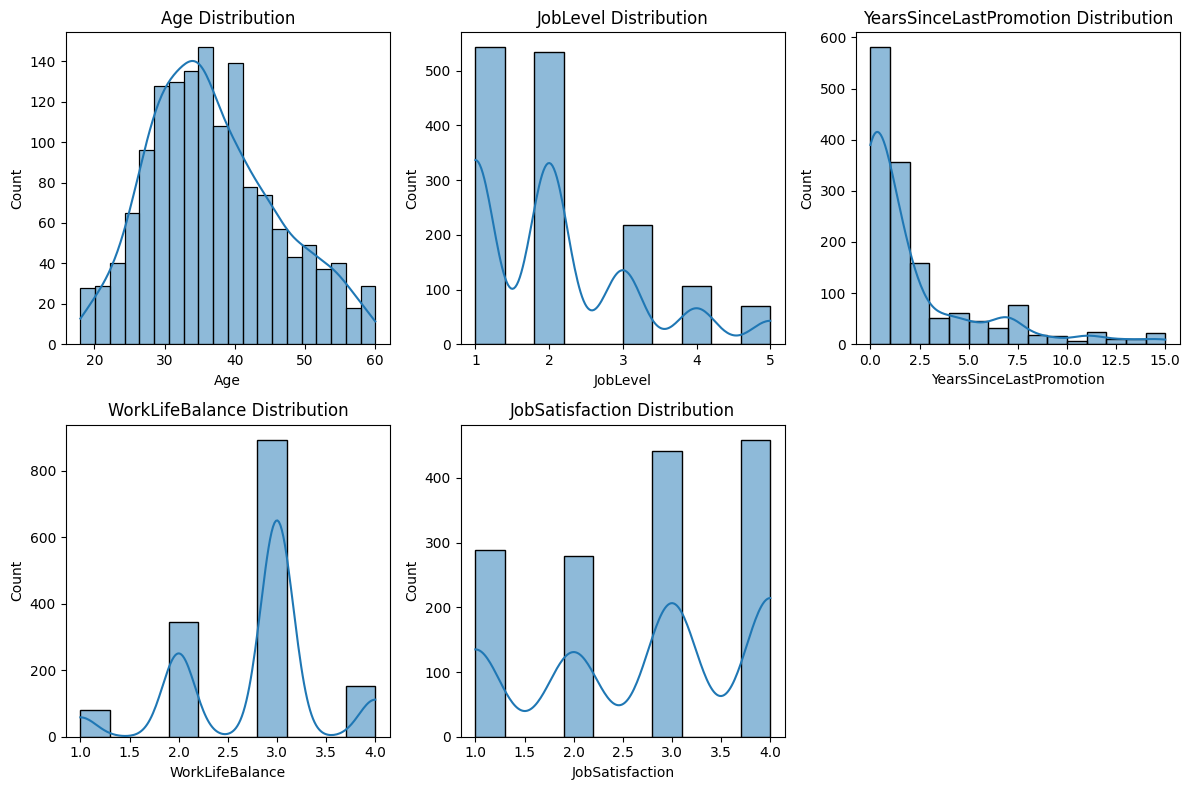

In [10]:
# 수치형 변수
plt.figure(figsize=(12, 8))

# 'Age' 변수
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')

# 'JobLevel' 변수
plt.subplot(2, 3, 2)
sns.histplot(df['JobLevel'], kde=True, bins=10)
plt.title('JobLevel Distribution')

# 'YearsSinceLastPromotion' 변수
plt.subplot(2, 3, 3)
sns.histplot(df['YearsSinceLastPromotion'], kde=True, bins=15)
plt.title('YearsSinceLastPromotion Distribution')

# 'WorkLifeBalance' 변수
plt.subplot(2, 3, 4)
sns.histplot(df['WorkLifeBalance'], kde=True, bins=10)
plt.title('WorkLifeBalance Distribution')

# 'JobSatisfaction' 변수
plt.subplot(2, 3, 5)
sns.histplot(df['JobSatisfaction'], kde=True, bins=10)
plt.title('JobSatisfaction Distribution')

plt.tight_layout()
plt.show()

### 3️⃣ 변수 간 관계 분석
- 상관 관계 분석 (corr, heatmap)
- 주요 변수들 간 관계 (pairplot, scatterplot)

/tmp/ipykernel_583006/3882443834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


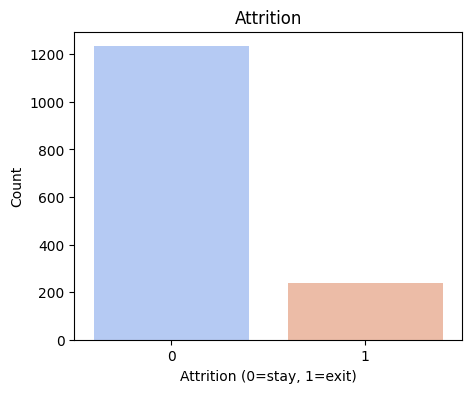

전체 직원 중 16.12%가 이탈함


In [36]:
# 이탈 여부 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition")
plt.xlabel("Attrition (0=stay, 1=exit)")
plt.ylabel("Count")
plt.show()

# 이탈률 계산
attrition_rate = df["Attrition"].mean() * 100
print(f"전체 직원 중 {attrition_rate:.2f}%가 이탈함")

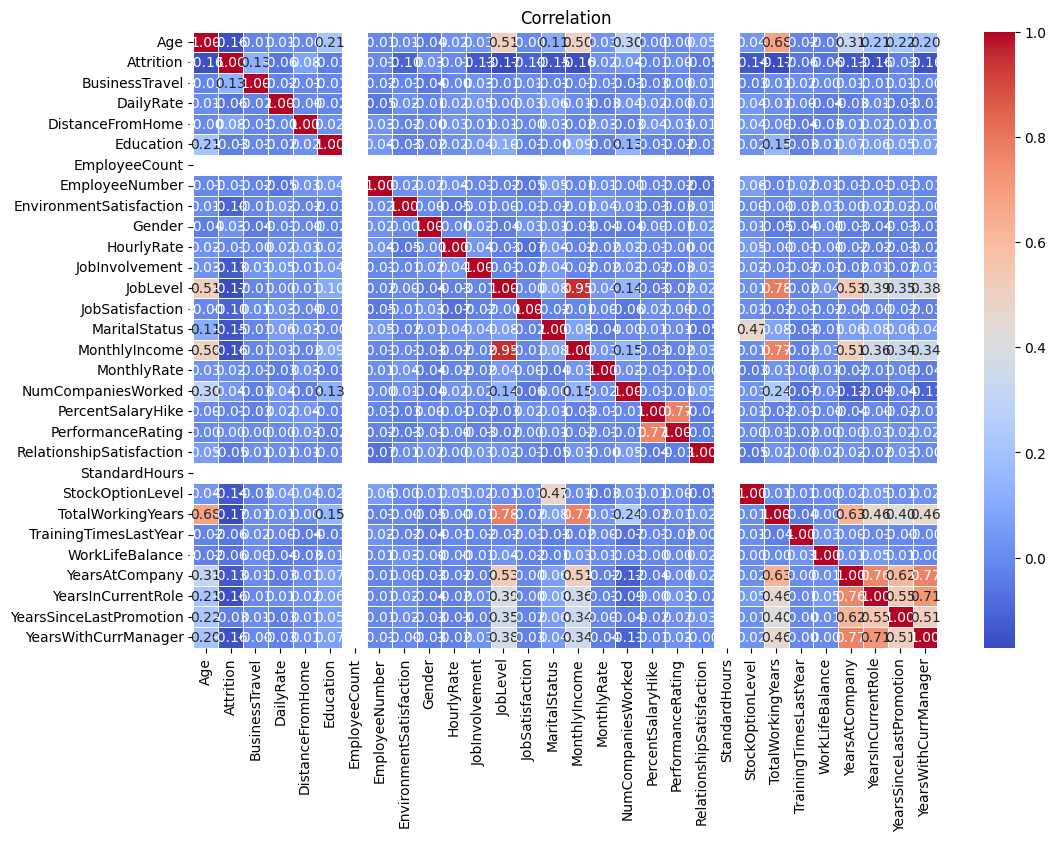

In [37]:
# 상관관계 분석
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation")
plt.show()

TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
MaritalStatus               0.145985
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
BusinessTravel              0.127006
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
EmployeeNumber              0.010577
HourlyRate                  0.006846
PerformanceRating           0.002889
E

/tmp/ipykernel_583006/1464972425.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_corr_sorted.values, y=attrition_corr_sorted.index, palette="coolwarm")


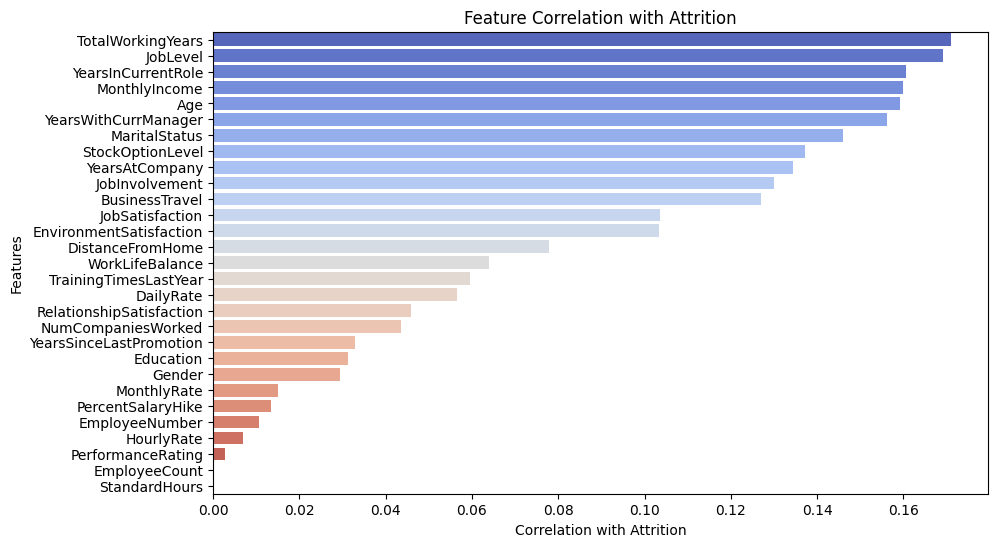

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

# Attrition과의 상관계수 추출
attrition_corr = correlation_matrix["Attrition"].drop("Attrition")  # 자기 자신 제외

# 상관계수 절댓값 기준으로 내림차순 정렬
attrition_corr_sorted = attrition_corr.abs().sort_values(ascending=False)

# 결과 출력
print(attrition_corr_sorted)

# 상위 10개 컬럼 출력
top_10_features = attrition_corr_sorted.head(10)
print("🔹 Attrition과 상관관계가 높은 상위 10개 컬럼:")
print(top_10_features)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_corr_sorted.values, y=attrition_corr_sorted.index, palette="coolwarm")
plt.xlabel("Correlation with Attrition")
plt.ylabel("Features")
plt.title("Feature Correlation with Attrition")
plt.show()

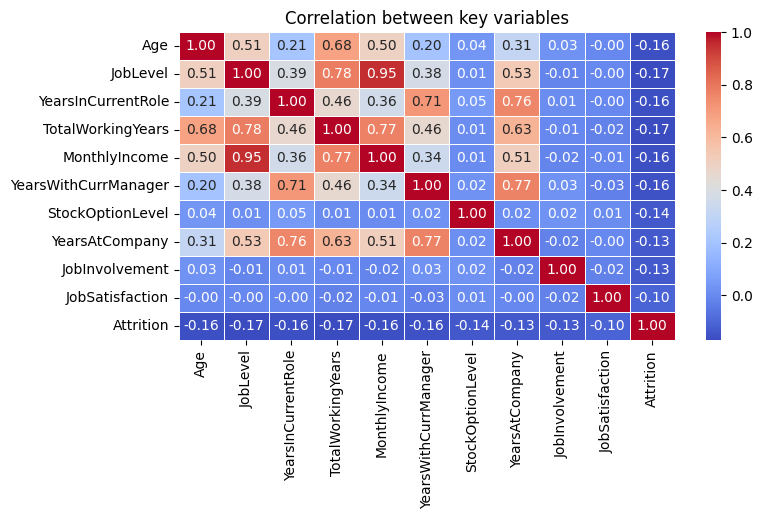

In [30]:
# X 변수와 타겟 변수 포함
df_key = df[['Age', 'JobLevel', 'YearsInCurrentRole', 'TotalWorkingYears', 'MonthlyIncome', 'MaritalStatus', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement','JobSatisfaction', 'Attrition']]

# 상관행렬 계산
plt.figure(figsize=(8, 4))
sns.heatmap(df_key.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between key variables")
plt.show()

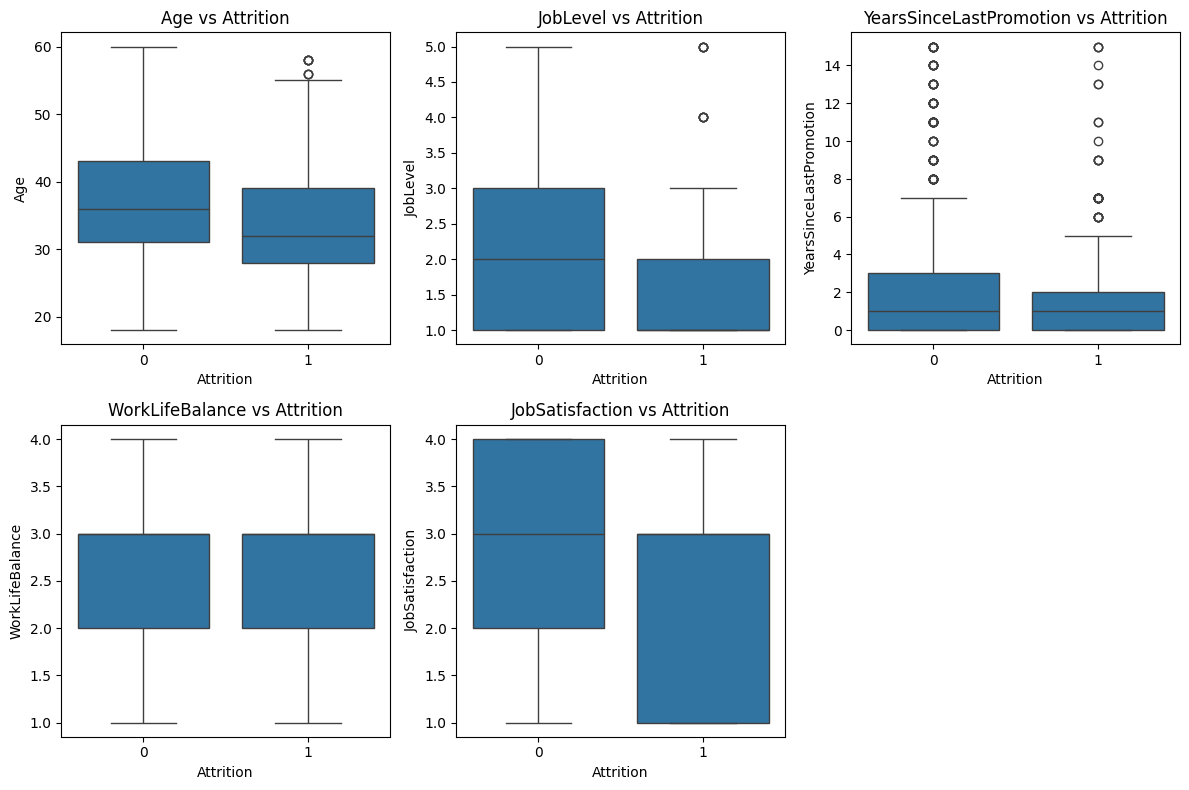

In [24]:
# 주요 변수들 간의 관계 분석
plt.figure(figsize=(12, 8))

# Age와 Attrition
plt.subplot(2, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')

# Job_Level과 Attrition
plt.subplot(2, 3, 2)
sns.boxplot(x='Attrition', y='JobLevel', data=df)
plt.title('JobLevel vs Attrition')

# YearsSinceLastPromotion과 Attrition
plt.subplot(2, 3, 3)
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('YearsSinceLastPromotion vs Attrition')

# WorkLifeBalance와 Attrition
plt.subplot(2, 3, 4)
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df)
plt.title('WorkLifeBalance vs Attrition')

# JobSatisfaction과 Attrition
plt.subplot(2, 3, 5)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('JobSatisfaction vs Attrition')

plt.tight_layout()
plt.show()

In [25]:
# 데이터 전처리
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Split
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Train
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Train
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Train
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Train
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Test
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Test
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Test
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Test
